In [1]:
import argparse
import numpy as np
import math
import matplotlib.pyplot as plt
import pandas as pd
from scipy.stats import stats
from scipy.integrate import quad
import scipy.special as sc
from scipy.integrate import odeint 
import scipy.optimize as spo
from scipy.optimize import curve_fit
import time 
import json
import os
from IPython.display import display, clear_output
from iminuit import Minuit
import uproot
import itertools

In [2]:
def plot_rate(file, int1=(21000,32000),int2=(50000,70000),avolt=13):
    data = pd.read_csv(file,delimiter="\s+", skiprows=14,
                   names=['a','b','c','d','e','f','rate','g','h','i','sec'])
    plt.figure(figsize=(12,6))
    plt.xlabel('Hours [h]', ha='right',x=1,fontsize=12)
    plt.ylabel('Rate [Hz]', ha='right',x=1,fontsize=12)
    mean1 = np.mean(data['rate'][int1[0]:int1[1]])
    mean2 = np.mean(data['rate'][int2[0]:int2[1]])
    std1 = np.std(data['rate'][int1[0]:int1[1]])
    std2 = np.std(data['rate'][int2[0]:int2[1]])
    plt.axvspan(data['sec'][int1[0]]/3600,data['sec'][int1[1]]/3600,color='r',alpha=0.2,
               label=f'rate {mean1:.1f}±{std1:.1f} Hz')
    plt.axvspan(data['sec'][int2[0]]/3600,data['sec'][int2[1]]/3600,color='m',alpha=0.2,
               label=f'rate {mean2:.1f}±{std2:.1f} Hz')
    #plt.xlim(40,110)
    #plt.ylim(0,750)
    plt.plot(data['sec']/3600,data['rate'])
    plt.title(f'ABALONE at {avolt} kV')
    #print(data['rate'])
    plt.legend(fontsize=14)

In [15]:
def moving_average(x, w):
    return np.convolve(x, np.ones(w), 'same') / w
def plot_all_rate(file1, file2 = None, file3 = None, file4 = None, file5 = None, file6 = None, file7 = None,
                  file8 = None, file9 = None, file10 = None, file11 = None, file12 = None, file13 = None,
                  file14 = None, file15 = None,
                  hours = (13,14,15,16,17,18), avolts = (13,14,15,16,17,18), width = 1,
                  ylim = None, xlim = None ):
    data = pd.read_csv(file1,delimiter="\s+", skiprows=14,
                      names=['a','b','c','d','e','f','rate','g','h','i','sec'])
    if file2 is not None:
        df2 = pd.read_csv(file2,delimiter="\s+", skiprows=14,
                          names=['a','b','c','d','e','f','rate','g','h','i','sec'])
        data = data.append(df2, ignore_index=True)
    if file3 is not None:
        df3 = pd.read_csv(file3,delimiter="\s+", skiprows=14,
                          names=['a','b','c','d','e','f','rate','g','h','i','sec'])
        data = data.append(df3, ignore_index=True)
    if file4 is not None:
        df4 = pd.read_csv(file4,delimiter="\s+", skiprows=14,
                          names=['a','b','c','d','e','f','rate','g','h','i','sec'])
        data = data.append(df4, ignore_index=True)
    if file5 is not None:
        df5 = pd.read_csv(file5,delimiter="\s+", skiprows=14,
                          names=['a','b','c','d','e','f','rate','g','h','i','sec'])
        data = data.append(df5, ignore_index=True)
    if file6 is not None:
        df6 = pd.read_csv(file6,delimiter="\s+", skiprows=14,
                          names=['a','b','c','d','e','f','rate','g','h','i','sec'])
        data = data.append(df6, ignore_index=True)
    if file7 is not None:
        df7 = pd.read_csv(file7,delimiter="\s+", skiprows=14,
                          names=['a','b','c','d','e','f','rate','g','h','i','sec'])
        data = data.append(df7, ignore_index=True)
    if file8 is not None:
        df8 = pd.read_csv(file8,delimiter="\s+", skiprows=14,
                          names=['a','b','c','d','e','f','rate','g','h','i','sec'])
        data = data.append(df8, ignore_index=True)
    if file9 is not None:
        df9 = pd.read_csv(file9,delimiter="\s+", skiprows=14,
                          names=['a','b','c','d','e','f','rate','g','h','i','sec'])
        data = data.append(df9, ignore_index=True)
    if file10 is not None:
        df10 = pd.read_csv(file10,delimiter="\s+", skiprows=14,
                          names=['a','b','c','d','e','f','rate','g','h','i','sec'])
        data = data.append(df10, ignore_index=True)
    if file11 is not None:
        df11 = pd.read_csv(file11,delimiter="\s+", skiprows=14,
                          names=['a','b','c','d','e','f','rate','g','h','i','sec'])
        data = data.append(df11, ignore_index=True)
    if file12 is not None:
        df12 = pd.read_csv(file12,delimiter="\s+", skiprows=14,
                          names=['a','b','c','d','e','f','rate','g','h','i','sec'])
        data = data.append(df12, ignore_index=True)
    if file13 is not None:
        df13 = pd.read_csv(file13,delimiter="\s+", skiprows=14,
                          names=['a','b','c','d','e','f','rate','g','h','i','sec'])
        data = data.append(df13, ignore_index=True)
    if file14 is not None:
        df14 = pd.read_csv(file14,delimiter="\s+", skiprows=14,
                          names=['a','b','c','d','e','f','rate','g','h','i','sec'])
        data = data.append(df14, ignore_index=True)
    if file15 is not None:
        df15 = pd.read_csv(file15,delimiter="\s+", skiprows=14,
                          names=['a','b','c','d','e','f','rate','g','h','i','sec'])
        data = data.append(df15, ignore_index=True)
    plt.figure(figsize=(12,6))
    plt.xlabel('Hours [h]', ha='right',x=1,fontsize=12)
    plt.ylabel('Rate [Hz]', ha='right',x=1,fontsize=12)
    #mean2 = np.mean(data['rate'][int2[0]:int2[1]])
    #std2 = np.std(data['rate'][int2[0]:int2[1]])
    #plt.axvspan(data['sec'][int1[0]]/3600,data['sec'][int1[1]]/3600,color='r',alpha=0.2,
    #           label=f'rate {mean1:.1f}±{std1:.1f} Hz')
    #)
    time = data.index*2/3600
    rate = moving_average(data['rate'], width)
    colors = ['r','b','g','c','m','y','brown','tab:pink','black','orange','r','b','g','c','m','y']
    means = np.zeros(15)
    for i, [hour, avolt, color] in enumerate(zip(hours, avolts, colors)):
        try: ll, rr = hours[i+1]-1,hours[i+1]-0.5
        except: ll, rr = time[-1]-0.5,time[-1]
        ill, irr = np.where(time>=ll)[0][0], np.where(time>=rr)[0][0]
        means[i] = np.mean(rate[ill:irr])
        std = np.std(rate[ill:irr])
        #print(ll,rr,ill,irr,means[i],std)
        plt.axvline(hour,label=f'ABALONE at {avolt} kV, rate: ${means[i]:.0f}\pm{std:.0f}$ Hz',c=color)
        print(f'ABALONE at {avolt} kV, rate: {means[i]:.0f} +/- {std:.0f} Hz')
        #plt.axvspan(ll,rr,color='r',alpha=0.2)
    if xlim is not None: plt.xlim(xlim[0],xlim[1])
    if ylim is not None: plt.ylim(ylim[0],ylim[1])
    plt.plot(time,rate,c='black')
    #plt.title(f'ABALONE at {avolt} kV')
    #print(data['rate'])
    #plt.legend(fontsize=14)
    return avolts, means

In [16]:
file7 = '/data/abalone/ABALONE_RampingUp/2021_08_23_Rate_7kV.txt'
file8 = '/data/abalone/ABALONE_RampingUp/2021_08_25_Rate_8kV.txt'
file9 = '/data/abalone/ABALONE_RampingUp/2021_08_25_Rate_9kV.txt'
file10 = '/data/abalone/ABALONE_RampingUp/2021_08_26_Rate_10kV.txt'
file11 = '/data/abalone/ABALONE_RampingUp/2021_08_27_Rate_11kV.txt'
file12 = '/data/abalone/ABALONE_RampingUp/2021_08_27_Rate_12kV.txt'
file13 = '/data/abalone/ABALONE_RampingUp/2021_08_30_Rate_13kV.txt'
file14 = '/data/abalone/ABALONE_RampingUp/2021_08_30_Rate_14kV.txt'
file15 = '/data/abalone/ABALONE_RampingUp/2021_08_31_Rate_15kV.txt'
file16 = '/data/abalone/ABALONE_RampingUp/2021_09_01_Rate_16kV.txt'
file17 = '/data/abalone/ABALONE_RampingUp/2021_09_03_Rate_17kV.txt'
file17b = '/data/abalone/ABALONE_RampingUp/2021_09_03_Rate_17kV_bis.txt'
file18 = '/data/abalone/ABALONE_RampingUp/2021_09_06_Rate_18kV.txt'
file18b = '/data/abalone/ABALONE_RampingUp/2021_09_08_Rate_18kV_bis.txt'
file19 = '/data/abalone/ABALONE_RampingUp/2021_09_09_Rate_19kV.txt'

ABALONE at 7 kV, rate: 342 +/- 38 Hz
ABALONE at 8 kV, rate: 308 +/- 33 Hz
ABALONE at 9 kV, rate: 369 +/- 17 Hz
ABALONE at 10 kV, rate: 382 +/- 13 Hz
ABALONE at 11 kV, rate: 596 +/- 19 Hz
ABALONE at 12 kV, rate: 261 +/- 9 Hz
ABALONE at 13 kV, rate: 461 +/- 16 Hz
ABALONE at 14 kV, rate: 529 +/- 14 Hz
ABALONE at 15 kV, rate: 603 +/- 15 Hz
ABALONE at 16 kV, rate: 541 +/- 14 Hz
ABALONE at 17 kV, rate: 471 +/- 12 Hz
ABALONE at 18 kV, rate: 629 +/- 17 Hz
ABALONE at 19 kV, rate: 740 +/- 16 Hz


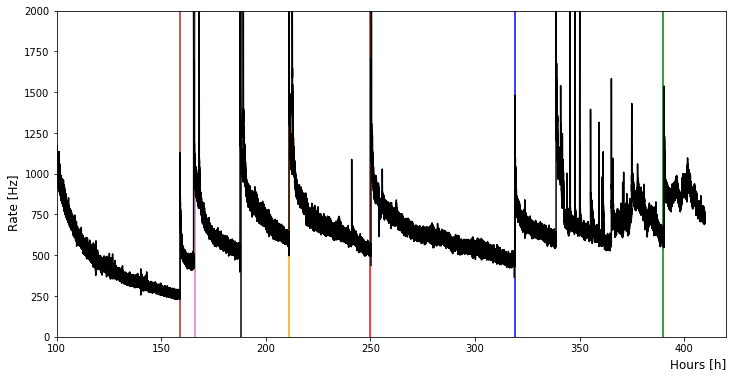

In [22]:
avolts, means = plot_all_rate(file7,file8,file9,file10,file11,file12,file13,file14,file15,file16,file17,file17b,
                              file18,file18b,file19,
                              hours=(0.2,42.8,45.6,66.5,89,97,159,166,188,211,250,319,390),
                              avolts=(7,8,9,10,11,12,13,14,15,16,17,18,19),
                              ylim=(0,2000), xlim=(100,420),width = 2)

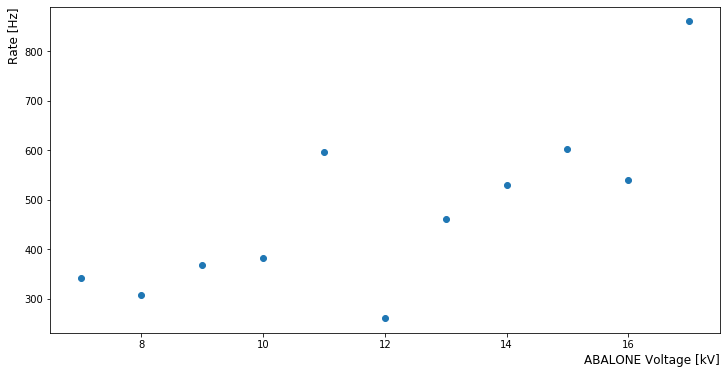

In [6]:
plt.figure(figsize=(12,6))
plt.xlabel('ABALONE Voltage [kV]', ha='right',x=1,fontsize=12)
plt.ylabel('Rate [Hz]', ha='right',y=1,fontsize=12)
plt.plot(avolts,means[:len(avolts)],'o')